# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    print(city_url) 
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)  # YOUR CODE HERE    
        city_weather = response.json()  # YOUR CODE HERE
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=ilulissat&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 1 of Set 1 | ilulissat
https://api.openweathermap.org/data/2.5/weather?q=lerwick&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 2 of Set 1 | lerwick
https://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 3 of Set 1 | port-aux-francais
https://api.openweathermap.org/data/2.5/weather?q=yellowknife&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 4 of Set 1 | yellowknife
https://api.openweathermap.org/data/2.5/weather?q=thompson&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 5 of Set 1 | thompson
https://api.openweathermap.org/data/2.5/weather?q=qaqortoq&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 6 of Set 1 | qaqortoq
https://ap

https://api.openweathermap.org/data/2.5/weather?q=college&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 4 of Set 2 | college
https://api.openweathermap.org/data/2.5/weather?q=siwa oasis&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 5 of Set 2 | siwa oasis
https://api.openweathermap.org/data/2.5/weather?q=kalmunai&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 6 of Set 2 | kalmunai
https://api.openweathermap.org/data/2.5/weather?q=longyearbyen&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 7 of Set 2 | longyearbyen
https://api.openweathermap.org/data/2.5/weather?q=aguadilla&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 8 of Set 2 | aguadilla
https://api.openweathermap.org/data/2.5/weather?q=ushuaia&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 9 of Set 2 | ushuaia
https://api.openweathermap.org/data/2.5/weather?q=floris&appid=1a23466a10d5b1415d565

City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=isangel&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 8 of Set 3 | isangel
https://api.openweathermap.org/data/2.5/weather?q=sitka&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 9 of Set 3 | sitka
https://api.openweathermap.org/data/2.5/weather?q=rongelap&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 10 of Set 3 | rongelap
https://api.openweathermap.org/data/2.5/weather?q=polyarnyy&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 11 of Set 3 | polyarnyy
https://api.openweathermap.org/data/2.5/weather?q=saint-philippe&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 12 of Set 3 | saint-philippe
https://api.openweathermap.org/data/2.5/weather?q=argo&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 13 of Set 3 | argo
https://api.openweathermap.org/data/2.5/weather?q=hubynykha&appi

https://api.openweathermap.org/data/2.5/weather?q=tura&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 11 of Set 4 | tura
https://api.openweathermap.org/data/2.5/weather?q=cooper's town&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 12 of Set 4 | cooper's town
https://api.openweathermap.org/data/2.5/weather?q='ohonua&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 13 of Set 4 | 'ohonua
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=rio cuarto&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 14 of Set 4 | rio cuarto
https://api.openweathermap.org/data/2.5/weather?q=marsh harbour&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 15 of Set 4 | marsh harbour
https://api.openweathermap.org/data/2.5/weather?q=utrik&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 16 of Set 4 | utrik
https://api.openweathermap.org/data/2.5/weather?q=la

https://api.openweathermap.org/data/2.5/weather?q=ilhabela&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 16 of Set 5 | ilhabela
https://api.openweathermap.org/data/2.5/weather?q=hunucma&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 17 of Set 5 | hunucma
https://api.openweathermap.org/data/2.5/weather?q=peace river&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 18 of Set 5 | peace river
https://api.openweathermap.org/data/2.5/weather?q=ar raqqah&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 19 of Set 5 | ar raqqah
https://api.openweathermap.org/data/2.5/weather?q=san patricio&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 20 of Set 5 | san patricio
https://api.openweathermap.org/data/2.5/weather?q=sidi akkacha&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 21 of Set 5 | sidi akkacha
https://api.openweathermap.org/data/2.5/weather?q=greymouth&appid=

https://api.openweathermap.org/data/2.5/weather?q=alofi&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 19 of Set 6 | alofi
https://api.openweathermap.org/data/2.5/weather?q=salinopolis&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 20 of Set 6 | salinopolis
https://api.openweathermap.org/data/2.5/weather?q=fale old settlement&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 21 of Set 6 | fale old settlement
https://api.openweathermap.org/data/2.5/weather?q=jiuquan&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 22 of Set 6 | jiuquan
https://api.openweathermap.org/data/2.5/weather?q=wanning&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 23 of Set 6 | wanning
https://api.openweathermap.org/data/2.5/weather?q=happy valley-goose bay&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 24 of Set 6 | happy valley-goose bay
https://api.openweathermap.org/data/2.5/we

https://api.openweathermap.org/data/2.5/weather?q=sirte&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 23 of Set 7 | sirte
https://api.openweathermap.org/data/2.5/weather?q=kogon shahri&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 24 of Set 7 | kogon shahri
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=severnoye&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 25 of Set 7 | severnoye
https://api.openweathermap.org/data/2.5/weather?q=diplo&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 26 of Set 7 | diplo
https://api.openweathermap.org/data/2.5/weather?q=carazinho&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 27 of Set 7 | carazinho
https://api.openweathermap.org/data/2.5/weather?q=slave lake&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 28 of Set 7 | slave lake
https://api.openweathermap.org/data/2.5/weather?q=kayang

https://api.openweathermap.org/data/2.5/weather?q=myory&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 26 of Set 8 | myory
https://api.openweathermap.org/data/2.5/weather?q=kabalo&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 27 of Set 8 | kabalo
https://api.openweathermap.org/data/2.5/weather?q=zaozersk&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 28 of Set 8 | zaozersk
https://api.openweathermap.org/data/2.5/weather?q=kenai&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 29 of Set 8 | kenai
https://api.openweathermap.org/data/2.5/weather?q=calingasta&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 30 of Set 8 | calingasta
https://api.openweathermap.org/data/2.5/weather?q=plasencia&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 31 of Set 8 | plasencia
https://api.openweathermap.org/data/2.5/weather?q=coquimbo&appid=1a23466a10d5b1415d565c28e5e88b94&

https://api.openweathermap.org/data/2.5/weather?q=oyon&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 30 of Set 9 | oyon
https://api.openweathermap.org/data/2.5/weather?q=pemangkat&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 31 of Set 9 | pemangkat
https://api.openweathermap.org/data/2.5/weather?q=miles city&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 32 of Set 9 | miles city
https://api.openweathermap.org/data/2.5/weather?q=tyukhtet&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 33 of Set 9 | tyukhtet
https://api.openweathermap.org/data/2.5/weather?q=gereshk&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 34 of Set 9 | gereshk
https://api.openweathermap.org/data/2.5/weather?q=harstad&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 35 of Set 9 | harstad
https://api.openweathermap.org/data/2.5/weather?q=saint-pierre&appid=1a23466a10d5b1415d565c28e

https://api.openweathermap.org/data/2.5/weather?q=guane&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 35 of Set 10 | guane
https://api.openweathermap.org/data/2.5/weather?q=silchar&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 36 of Set 10 | silchar
https://api.openweathermap.org/data/2.5/weather?q=pathein&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 37 of Set 10 | pathein
https://api.openweathermap.org/data/2.5/weather?q=drayton valley&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 38 of Set 10 | drayton valley
https://api.openweathermap.org/data/2.5/weather?q=puerto escondido&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 39 of Set 10 | puerto escondido
https://api.openweathermap.org/data/2.5/weather?q=borzya&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 40 of Set 10 | borzya
https://api.openweathermap.org/data/2.5/weather?q=flin flon&appid=1a

https://api.openweathermap.org/data/2.5/weather?q=puerto armuelles&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 40 of Set 11 | puerto armuelles
https://api.openweathermap.org/data/2.5/weather?q=kodinsk&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 41 of Set 11 | kodinsk
https://api.openweathermap.org/data/2.5/weather?q=shwebo&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 42 of Set 11 | shwebo
https://api.openweathermap.org/data/2.5/weather?q=gazojak&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 43 of Set 11 | gazojak
https://api.openweathermap.org/data/2.5/weather?q=tocopilla&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 44 of Set 11 | tocopilla
https://api.openweathermap.org/data/2.5/weather?q=sarmiento&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 45 of Set 11 | sarmiento
https://api.openweathermap.org/data/2.5/weather?q=guerrero negro&appid

https://api.openweathermap.org/data/2.5/weather?q=afua&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 43 of Set 12 | afua
https://api.openweathermap.org/data/2.5/weather?q=winslow&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 44 of Set 12 | winslow
https://api.openweathermap.org/data/2.5/weather?q=calvinia&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 45 of Set 12 | calvinia
https://api.openweathermap.org/data/2.5/weather?q=ad dabbah&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 46 of Set 12 | ad dabbah
https://api.openweathermap.org/data/2.5/weather?q=deder&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 47 of Set 12 | deder
https://api.openweathermap.org/data/2.5/weather?q=kanniyakumari&appid=1a23466a10d5b1415d565c28e5e88b94&units=metric
Processing Record 48 of Set 12 | kanniyakumari
https://api.openweathermap.org/data/2.5/weather?q=port glaud&appid=1a23466a10d5b1415d5

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data, columns = ['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])# YOUR CODE HERE

# Show Record Count
city_data_df.count()

# Drop any cities that were skipped because they could not return any response from OpenWeatherMap API.


City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data

# Display the DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,4.01,70,75,1.54,GL,1686862249
1,lerwick,60.1545,-1.1494,16.00,69,67,1.15,GB,1686862249
2,port-aux-francais,-49.3500,70.2167,6.64,97,99,11.83,TF,1686862249
3,yellowknife,62.4560,-114.3525,17.29,48,75,8.23,CA,1686862249
4,thompson,55.7435,-97.8558,20.09,37,20,3.09,CA,1686862241


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ilulissat,69.2167,-51.1000,4.01,70,75,1.54,GL,1686862249
1,lerwick,60.1545,-1.1494,16.00,69,67,1.15,GB,1686862249
2,port-aux-francais,-49.3500,70.2167,6.64,97,99,11.83,TF,1686862249
3,yellowknife,62.4560,-114.3525,17.29,48,75,8.23,CA,1686862249
4,thompson,55.7435,-97.8558,20.09,37,20,3.09,CA,1686862241
...,...,...,...,...,...,...,...,...,...
572,kanniyakumari,8.0833,77.5667,27.60,79,99,9.42,IN,1686862375
573,long beach,33.7670,-118.1892,22.43,75,100,3.13,US,1686862125
574,eyl,7.9803,49.8164,25.69,79,83,9.42,SO,1686862376
575,muromtsevo,56.3724,75.2418,7.55,92,56,1.64,RU,1686862376


In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,4.01,70,75,1.54,GL,1686862249
1,lerwick,60.1545,-1.1494,16.00,69,67,1.15,GB,1686862249
2,port-aux-francais,-49.3500,70.2167,6.64,97,99,11.83,TF,1686862249
3,yellowknife,62.4560,-114.3525,17.29,48,75,8.23,CA,1686862249
4,thompson,55.7435,-97.8558,20.09,37,20,3.09,CA,1686862241


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

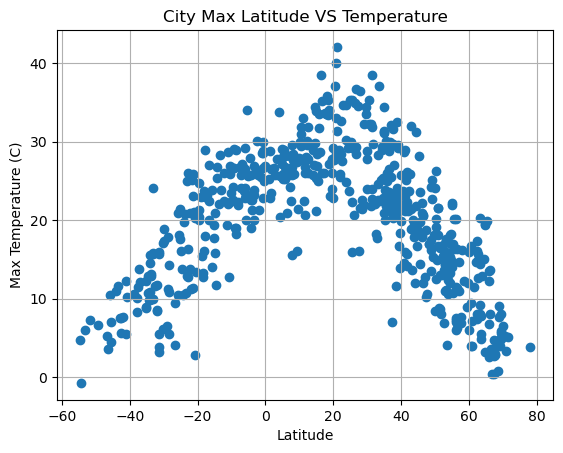

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude VS Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

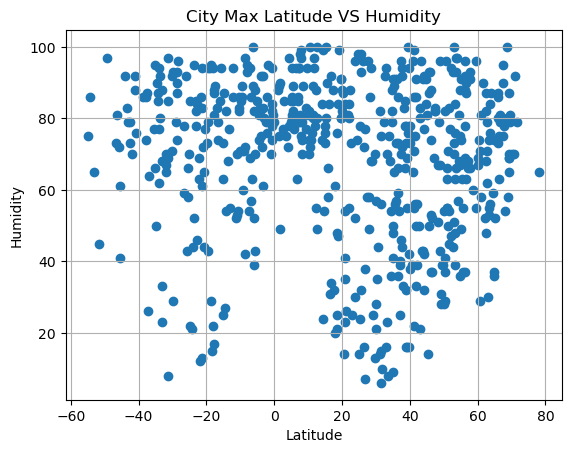

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude VS Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

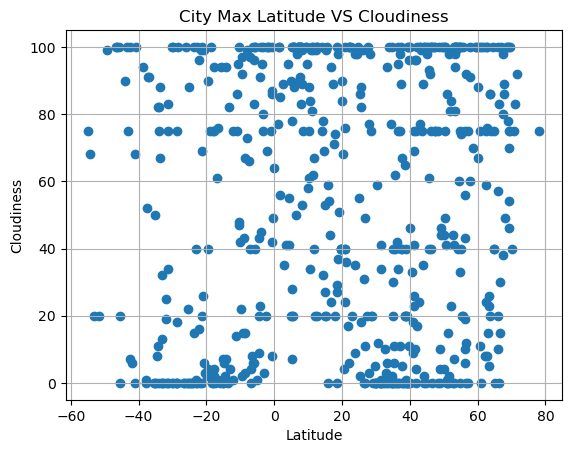

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude VS Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

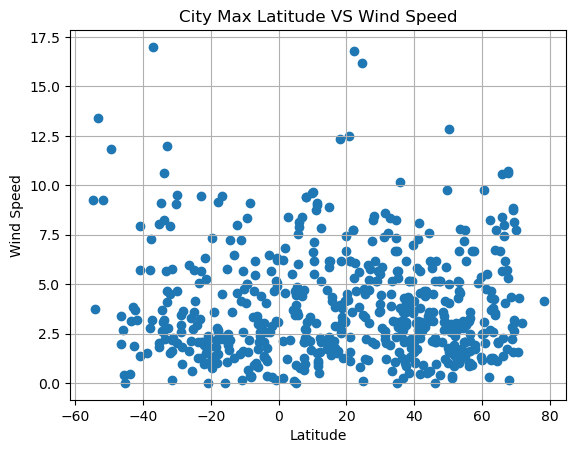

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude VS Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def myfunc(x):
  return slope * x + intercept

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,4.01,70,75,1.54,GL,1686862249
1,lerwick,60.1545,-1.1494,16.00,69,67,1.15,GB,1686862249
3,yellowknife,62.4560,-114.3525,17.29,48,75,8.23,CA,1686862249
4,thompson,55.7435,-97.8558,20.09,37,20,3.09,CA,1686862241
5,qaqortoq,60.7167,-46.0333,3.98,71,11,2.52,GL,1686862250


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,6.64,97,99,11.83,TF,1686862249
7,puerto natales,-51.7236,-72.4875,7.25,45,20,9.26,CL,1686862007
8,teluknaga,-6.0989,106.6381,26.45,82,83,2.97,ID,1686862250
9,christies beach,-35.1396,138.4698,12.30,66,0,8.05,AU,1686862251
12,port mathurin,-19.6833,63.4167,24.73,73,2,7.33,MU,1686862251


###  Temperature vs. Latitude Linear Regression Plot

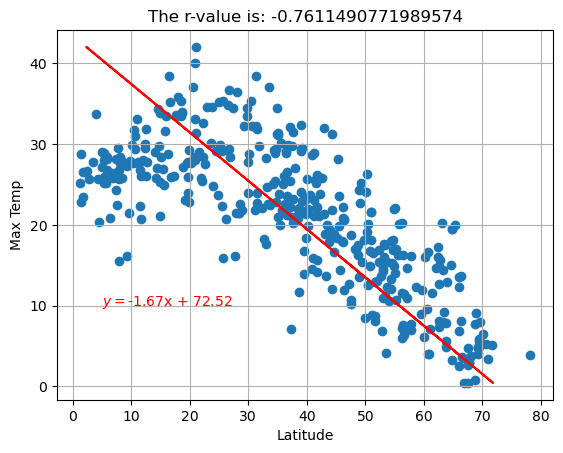

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

slope, intercept, r, p, std_err = linregress(northern_hemi_df["Max Temp"],northern_hemi_df["Lat"])

mymodel = list(map(myfunc, northern_hemi_df["Max Temp"]))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(mymodel,northern_hemi_df["Max Temp"],'red')


plt.title("The r-value is: {r:}" .format(r=r))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.text(5, 10, '$y=${m:.2f}x + {c:.2f}'.format(m=slope,c=intercept)  , {'color': 'r', 'fontsize': 10})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig5.png")


plt.show()

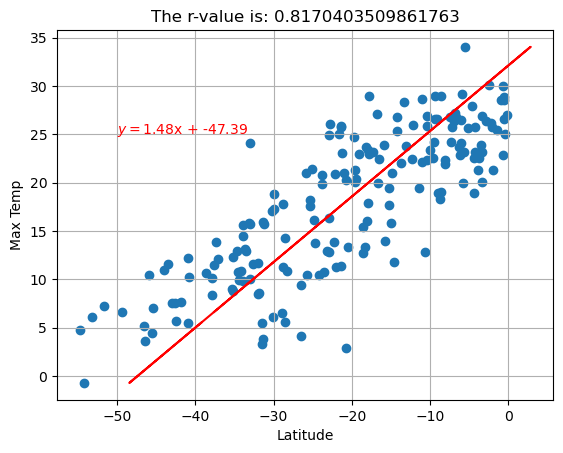

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Max Temp"],southern_hemi_df["Lat"])

mymodel = list(map(myfunc, southern_hemi_df["Max Temp"]))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(mymodel,southern_hemi_df["Max Temp"],'red')


plt.title("The r-value is: {r:}" .format(r=r))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.text(-50, 25, '$y=${m:.2f}x + {c:.2f}'.format(m=slope,c=intercept)  , {'color': 'r', 'fontsize': 10})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig6.png")


plt.show()

**Discussion about the linear relationship:** The lower the latitude, the higher the temperature.
Or, the higher the latutude, the lower temperature. In other words, this graph show the relationship between the temperature and the latitude.

### Humidity vs. Latitude Linear Regression Plot

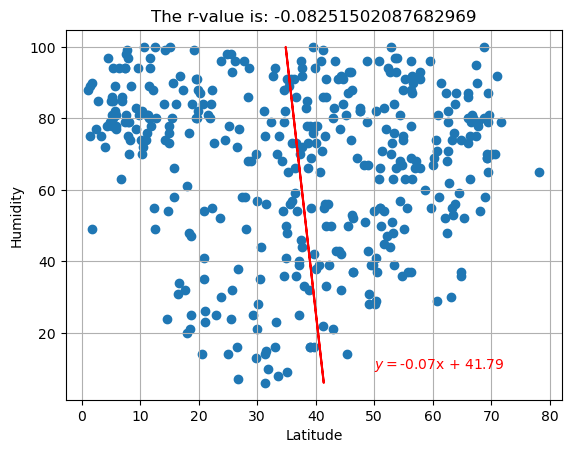

In [17]:
# Northern Hemisphere
# YOUR CODE HERE


slope, intercept, r, p, std_err = linregress(northern_hemi_df["Humidity"],northern_hemi_df["Lat"])

mymodel = list(map(myfunc, northern_hemi_df["Humidity"]))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(mymodel,northern_hemi_df["Humidity"],'red')


plt.title("The r-value is: {r:}" .format(r=r))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.text(50, 10, '$y=${m:.2f}x + {c:.2f}'.format(m=slope,c=intercept)  , {'color': 'r', 'fontsize': 10})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig7.png")


plt.show()

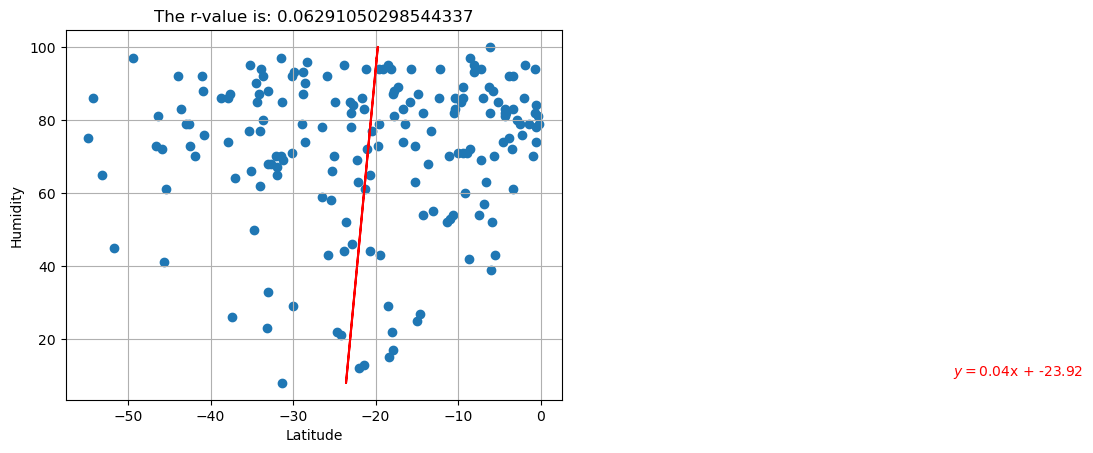

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Humidity"],southern_hemi_df["Lat"])

mymodel = list(map(myfunc, southern_hemi_df["Humidity"]))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(mymodel,southern_hemi_df["Humidity"],'red')


plt.title("The r-value is: {r:}" .format(r=r))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.text(50, 10, '$y=${m:.2f}x + {c:.2f}'.format(m=slope,c=intercept)  , {'color': 'r', 'fontsize': 10})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig8.png")


plt.show()

**Discussion about the linear relationship:** This graph shows the humidity stays about the same no matter what the latitude it is.In other words, the humidity is not affected by the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

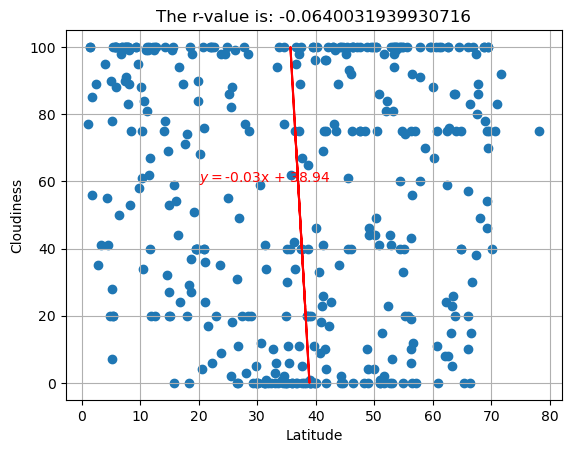

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

slope, intercept, r, p, std_err = linregress(northern_hemi_df["Cloudiness"],northern_hemi_df["Lat"])

mymodel = list(map(myfunc, northern_hemi_df["Cloudiness"]))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(mymodel,northern_hemi_df["Cloudiness"],'red')


plt.title("The r-value is: {r:}" .format(r=r))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.text(20, 60, '$y=${m:.2f}x + {c:.2f}'.format(m=slope,c=intercept)  , {'color': 'r', 'fontsize': 10})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig9.png")


plt.show()

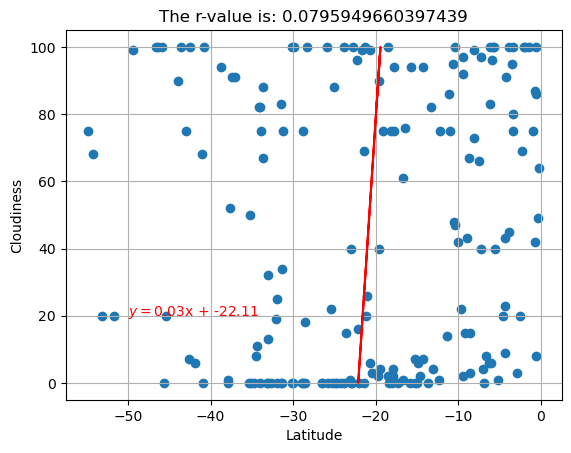

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
slope, intercept, r, p, std_err = linregress(southern_hemi_df["Cloudiness"],southern_hemi_df["Lat"])

mymodel = list(map(myfunc, southern_hemi_df["Cloudiness"]))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(mymodel,southern_hemi_df["Cloudiness"],'red')


plt.title("The r-value is: {r:}" .format(r=r))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.text(-50, 20, '$y=${m:.2f}x + {c:.2f}'.format(m=slope,c=intercept)  , {'color': 'r', 'fontsize': 10})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig10.png")


plt.show()

**Discussion about the linear relationship:** The higher the latitude, the higher the cloudiness.
Or, the lower the latutude, the lower cloudiness. In other words, this graph show the relationship between cloudiness and the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

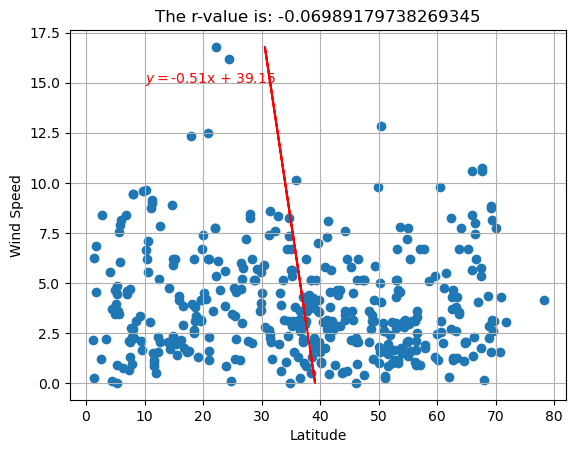

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
slope, intercept, r, p, std_err = linregress(northern_hemi_df["Wind Speed"],northern_hemi_df["Lat"])

mymodel = list(map(myfunc, northern_hemi_df["Wind Speed"]))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(mymodel,northern_hemi_df["Wind Speed"],'red')


plt.title("The r-value is: {r:}" .format(r=r))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.text(10, 15, '$y=${m:.2f}x + {c:.2f}'.format(m=slope,c=intercept)  , {'color': 'r', 'fontsize': 10})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig11.png")


plt.show()

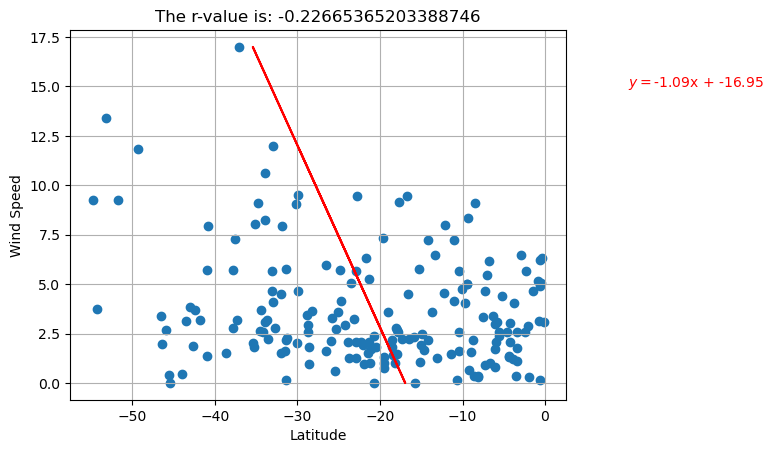

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

slope, intercept, r, p, std_err = linregress(southern_hemi_df["Wind Speed"],southern_hemi_df["Lat"])

mymodel = list(map(myfunc, southern_hemi_df["Wind Speed"]))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(mymodel,southern_hemi_df["Wind Speed"],'red')


plt.title("The r-value is: {r:}" .format(r=r))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.text(10, 15, '$y=${m:.2f}x + {c:.2f}'.format(m=slope,c=intercept)  , {'color': 'r', 'fontsize': 10})
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig12.png")


plt.show()

**Discussion about the linear relationship:** The lower the latitude, the higher the wind speed. Or, the higher the latitude, the lower the wind speed. But this graph also shows the wind speed almost always under a speed of 10,with most wind speeds being less than 5.